<a href="https://colab.research.google.com/github/mfaris16/MathJax-src/blob/master/rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    http://download1337.mediafire.com/fe3m2gibapxg/as5sbqajay8cedl/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    http://download1512.mediafire.com/ig6xbbqujzzg/zth94mout6dn9tm/rps-cv-images.zip \
    -O /tmp/rps-cv-images.zip

--2020-05-13 00:22:44--  http://download1337.mediafire.com/fe3m2gibapxg/as5sbqajay8cedl/rps.zip
Resolving download1337.mediafire.com (download1337.mediafire.com)... 205.196.123.25
Connecting to download1337.mediafire.com (download1337.mediafire.com)|205.196.123.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160622116 (153M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 153.18M   944KB/s    in 2m 47s  

2020-05-13 00:25:31 (939 KB/s) - ‘/tmp/rps.zip’ saved [160622116/160622116]

--2020-05-13 00:25:36--  http://download1512.mediafire.com/ig6xbbqujzzg/zth94mout6dn9tm/rps-cv-images.zip
Resolving download1512.mediafire.com (download1512.mediafire.com)... 205.196.123.200
Connecting to download1512.mediafire.com (download1512.mediafire.com)|205.196.123.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160684306 (153M) [application/zip]
Saving to: ‘/tmp/rps-cv-images.zip’

/tmp/rps-cv-images. 

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rps/')
zip_ref.close()

local_zip = '/tmp/rps-cv-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['tZFZV6hmUogDBeMl.png', '96Sw16ZnG0zF8Qo0.png', 'i85n2S7UREOq5svM.png', 'i5FY2iOcMjYyop5u.png', 'qUjyvBdP04lUmBkl.png', 'clIAiFiURAZ36c8y.png', 'RpCSMPJ0LhFPYksZ.png', 'bX0QhJtFkkDn1bEw.png', 'Bvw2wNs7Vb4H5nx9.png', 'QSa6ILjZeRdKM5Fz.png']
['TcybcTuKdMPA4xpT.png', '9xyvz1JbPwNqtLgH.png', 'dZxpgHYRuQNv7T7A.png', '3K6a8bG8j1YTH1l0.png', 'q35FqG8h9VCDbQ1J.png', 'O0fq1v7s6qxN8o9L.png', 'JZ8KCFK6y0Zd87Xl.png', 'XnvU9UjrhVwfnSgj.png', 'Qbn4RJqessetWPHR.png', '52nvTykEONIdmqQI.png']
['vMAludIRGF14FuGn.png', 'VQI4ru8aVkvWIHT4.png', '277q9TUTAsBAbTCj.png', '6ZAZiGMRp4VD1hDD.png', 'JCPNp02x7U7KU7bP.png', 'B9HRznSZlfXYAUwK.png', 'TJUiCdN9LUl2xPSE.png', 'Gr3EpS7AO3KtWTz0.png', 'o00DBW79f2BHDaJ2.png', 'PV4JNT7EUevp0FDj.png']


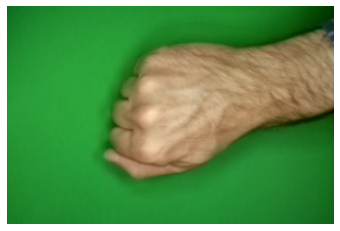

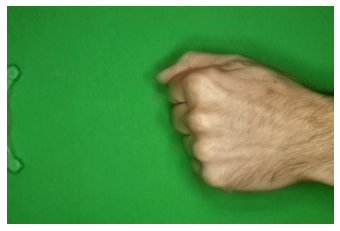

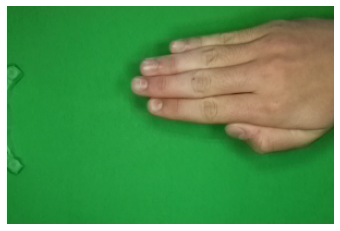

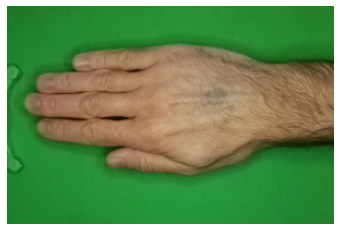

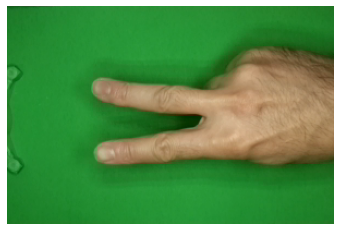

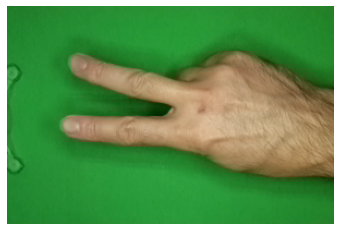

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-cv-images/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

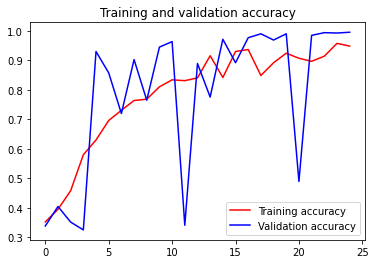

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 1vQCX4af6hQmuwxZ.png to 1vQCX4af6hQmuwxZ.png
1vQCX4af6hQmuwxZ.png
Scissors


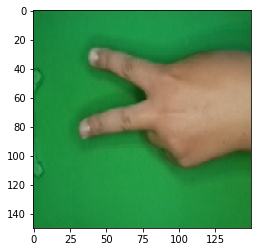

In [0]:
import numpy as np
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  label_arg = classes.argmax(axis=-1)[0]
  label = ['Paper', 'Rock', 'Scissors']

  print(fn)
  print(label[label_arg])

